# Výpočet odezvy Kelvina a Maxwellova článku na zatížení

***

Vypracované řešení zašlete včetně scriptu nebo pomocných výpočtů na adresu petr.havlasek@cvut.cz<br>

Řešení je možné odezvdat do příštího cvičení.

Jako předmět zprávy uveďte **PRPM: BONUS**

***

## Zadání:

Je zadán Kelvinův a Maxwellův článek, oba jsou charakterizované tuhostí pružiny $E = 1$ MPa a viskozitou tlumiče $\eta = 1$ MPa den.
Články byly podrobeny zatěžovací zkoušce, při které byla měněna hladina napětí $\sigma$:

- $t \in \left< 0, \tau \right) \dots \sigma(t) = \hat{\sigma} = 20$ MPa
  
- $t \in \left< \tau, 2 \tau \right) \dots \sigma(t) = 0$ MPa
  
- $t \in \left< 2 \tau, 3 \tau \right) \dots \sigma(t) = -\hat{\sigma} = -20$ MPa
  
- $t \in \left< 3 \tau, 4 \tau \right> \dots \sigma(t) = 0$ MPa
  
kde $\tau$ je retardační, příp. relaxační čas definovaný jako $\tau = \eta/E$.

Vykreslete průběh deformace obou článků a vypočtěte její hodnotu v násobcích charakteristického času ($\tau ... 4\tau$). 

Pokud v těchto časech dochází ke skoku, uveďte, prosím, hodnotu zleva i zprava.

Pro řešení můžete využít následující skript, který ukazuje výpočet funkce poddajnosti obou článků.


# Example: Compliance functions of Kelvin and Maxwell units

In [1]:
%matplotlib inline

import math
import numpy as np

import matplotlib.pyplot as plt


## Compliance function of a Kelvin unit
**Notation:**

- `E` ... spring stiffness [MPa]

- `eta` ... dashpot viscosity [MPa day]

- `t` ... time of interest [day]

- `tt` ... time of loading [day]

- `tau` ... retardation time [day]

$J(t,tt) = \frac{1}{E} \left[ 1 - \exp (-(t-tt)/\tau) \right]$

In [2]:
def Kelvin_J_func(E, eta, t, tt):

    tau = eta / E # retardation time

    if t > tt:
        dt = t-tt

        if tau > 0.:
            return 1./ E * ( 1. - math.exp(-(dt)/ tau) )
        else:
            return 1./ E
            
    else:
        return 0.

## Compliance function of a Maxwell unit
**Notation:**

- `E` ... spring stiffness [MPa]

- `eta` ... dashpot viscosity [MPa day]

- `t` ... time of interest [day]

- `tt` ... time of loading [day]

- `tau` ... relaxation time [day], $\tau = \eta/E$

$J(t,tt) = \frac{1}{E} + \frac{t-tt}{\eta}$

In [3]:
def Maxwell_J_func(E, eta, t, tt):

    if t >= tt:
        dt = t-tt

        return 1./ E  + dt / eta
            
    else:
        return 0.

## Solution

In [4]:
# Definition of parameters
E = 1. # MPa
eta = 1. # MPa * day

tau = eta/E # day

times = np.linspace(0., 4, num = 1000 )

# Evaluation of the compliance function 
J_Kelvin = []
for t in times:
    J_Kelvin.append(  Kelvin_J_func(E, eta, t, 0.) )     
   
J_Maxwell = []
for t in times:
    J_Maxwell.append(  Maxwell_J_func(E, eta, t, 0.) )     
    

J_Kelvin = np.asarray(J_Kelvin)
J_Maxwell = np.asarray(J_Maxwell)

epsilon_Kelvin = np.zeros(times.shape)
epsilon_Kelvin = 20 * J_Kelvin
epsilon_Kelvin[times > 1] -= 20 * J_Kelvin[0:len(times[times>1])]
epsilon_Kelvin[times > 2] -= 20 * J_Kelvin[0:len(times[times>2])]
epsilon_Kelvin[times > 3] += 20 * J_Kelvin[0:len(times[times>3])]

epsilon_Maxwell= np.zeros(times.shape)
epsilon_Maxwell= 20 * J_Maxwell
epsilon_Maxwell[times > 1] -= 20 * J_Maxwell[0:len(times[times>1])]
epsilon_Maxwell[times > 2] -= 20 * J_Maxwell[0:len(times[times>2])]
epsilon_Maxwell[times > 3] += 20 * J_Maxwell[0:len(times[times>3])]


## Plotting

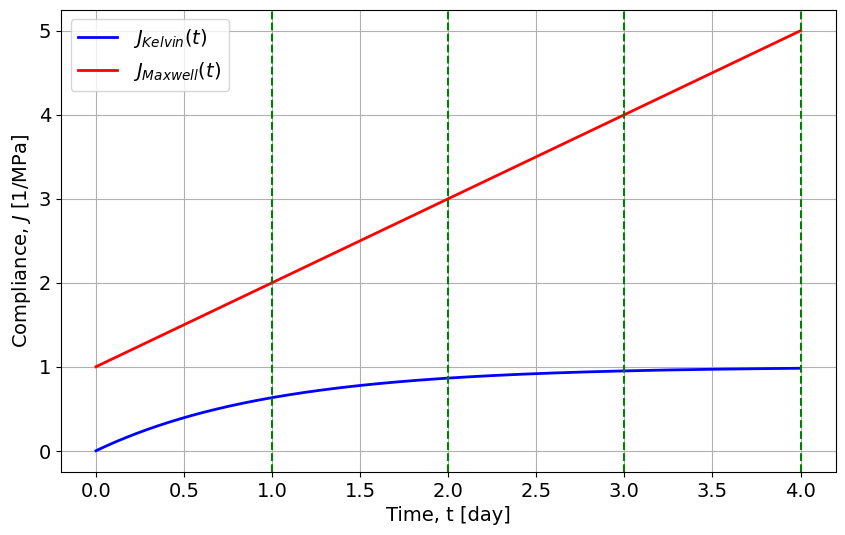

In [5]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})

plt.plot(times, J_Kelvin, lw=2., color="blue", label=r'$J_{Kelvin}(t)$')
plt.plot(times, J_Maxwell, lw=2., color="red", label=r'$J_{Maxwell}(t)$')

# vertical line corresponding to characteristic (retardation) time
plt.axvline(x = tau, lw=1.5, color="green", linestyle = "--")
plt.axvline(x = 2.*tau, lw=1.5, color="green", linestyle = "--")
plt.axvline(x = 3.*tau, lw=1.5, color="green", linestyle = "--")
plt.axvline(x = 4.*tau, lw=1.5, color="green", linestyle = "--")


plt.grid(True)
plt.legend()
plt.xlabel('Time, t [day]')
plt.ylabel(r'Compliance, $J$ [1/MPa]')

plt.savefig('Compliance_function_Maxwell_Kelvin.pdf')

plt.show()
    

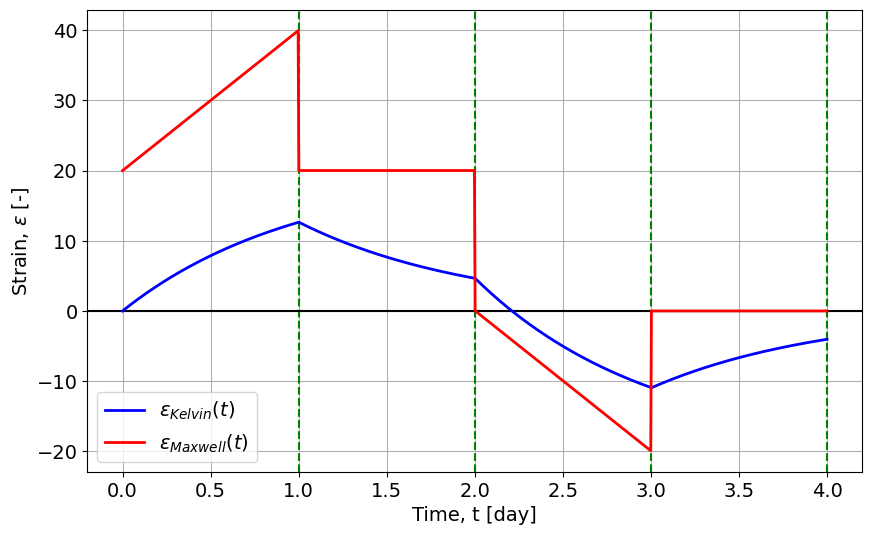

In [6]:

plt.figure(figsize=(10,6))

plt.axvline(x = tau, lw=1.5, color="green", linestyle = "--")
plt.axvline(x = 2.*tau, lw=1.5, color="green", linestyle = "--")
plt.axvline(x = 3.*tau, lw=1.5, color="green", linestyle = "--")
plt.axvline(x = 4.*tau, lw=1.5, color="green", linestyle = "--")

plt.axhline(y=0, lw=1.5, color='black')

plt.plot(times, epsilon_Kelvin, lw=2., color="blue", label=r"$\epsilon_{Kelvin}(t)$")
plt.plot(times, epsilon_Maxwell, lw=2., color="red", label=r"$\epsilon_{Maxwell}(t)$")

plt.grid()
plt.xlabel('Time, t [day]')
plt.ylabel(r'Strain, $\epsilon$ [-]')
plt.legend()

plt.savefig('Strain_Maxwell_Kelvin.pdf')

plt.show()

In [7]:
print("Kelvin:")
print("-------")

times = [1, 2, 3, 4]
d_stress = [ +20, -20, -20, +20]

for i, time in enumerate(times):
    
    strain = 0
    
    for j in range(i+1):
        strain += d_stress[j] * Kelvin_J_func(E, eta, time - j, 0.)
    
    
    print(f"epsilon(t={time}) = {strain:.6f}")
    
print("="*40)
print("")
print("Maxwell:")
print("--------")

for i, time in enumerate(times):
    strain_left = 0
    strain_right = 0
    
    for j in range(i+1):
        strain_left += d_stress[j] * Maxwell_J_func(E, eta, time - j, 0.)
    
    print(f"zleva:  epsilon(t={time}) = {strain_left:.6f}")
    
    if i != 3:
            strain_right = strain_left + d_stress[i+1] * Maxwell_J_func(E, eta, 0, 0)
            print(f"zprava: epsilon(t={time}) = {strain_right:.6f}")
    print("")

Kelvin:
-------
epsilon(t=1) = 12.642411
epsilon(t=2) = 4.650883
epsilon(t=3) = -10.931447
epsilon(t=4) = -4.021455

Maxwell:
--------
zleva:  epsilon(t=1) = 40.000000
zprava: epsilon(t=1) = 20.000000

zleva:  epsilon(t=2) = 20.000000
zprava: epsilon(t=2) = 0.000000

zleva:  epsilon(t=3) = -20.000000
zprava: epsilon(t=3) = 0.000000

zleva:  epsilon(t=4) = 0.000000
